# train universal phrase encoder
ref: 
- https://www.kaggle.com/xhlulu/disaster-nlp-train-a-universal-sentence-encoder
- https://amitness.com/2020/06/universal-sentence-encoder/
- https://www.tensorflow.org/hub/common_issues
- https://keras.io/guides/functional_api/

In [1]:
import pandas as pd

import tensorflow as tf
# import tensorflow.compat.v1 as tf
# tf.disable_eager_execution()
from tensorflow import keras
import tensorflow_hub as hub
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Dropout, Concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np

tf.__version__

'1.15.0'

### save & load test

In [2]:
# module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
module_url = 'https://tfhub.dev/google/universal-sentence-encoder-large/5'
module = hub.KerasLayer(module_url, trainable=True, name='USE_embedding')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [3]:
inputs = tf.keras.Input(shape=(), dtype=tf.string, name="text_input1")
outputs = module(inputs)

model = tf.keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_input1 (InputLayer)     [(None,)]                 0         
_________________________________________________________________
USE_embedding (KerasLayer)   (None, 512)               147354880 
Total params: 147,354,880
Trainable params: 147,354,880
Non-trainable params: 0
_________________________________________________________________


In [11]:
keras.utils.plot_model(model, "model.png", show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [5]:
tmp_text = ["good boy", "hello there", "so good"]
# before =  model.predict( [{"text_input1": tmp_text}] )
before =  model.predict(tmp_text)

AttributeError: 'str' object has no attribute 'shape'

In [6]:
before

NameError: name 'before' is not defined

In [7]:
# # save & load test
# from tensorflow import keras

# model.save("../TEST/")
# model_2 = keras.models.load_model("../TEST/")
# after =  model_2.predict(["good boy", "hello there"])

## Model (siamese network)
- https://www.pyimagesearch.com/2019/02/04/keras-multiple-inputs-and-mixed-data/
- https://colab.research.google.com/github/goodboychan/chans_jupyter/blob/main/_notebooks/2020-07-28-02-Multiple-Inputs-in-keras.ipynb#scrollTo=zCUFk5nvu6rQ

In [8]:
import pandas as pd
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras import layers
from tensorflow.keras import Model

from tensorflow.keras.optimizers import Adam, SGD

tf.__version__

'2.2.0'

In [9]:
# module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
module_url = 'https://tfhub.dev/google/universal-sentence-encoder-large/5'
use_module = hub.KerasLayer(module_url, trainable=True, name='USE_embedding')

In [10]:
# define two input_text
input_1 = tf.keras.Input(shape=(), dtype=tf.string, name="text_input1")
input_2 = tf.keras.Input(shape=(), dtype=tf.string, name="text_input2")

In [11]:
x_1 = use_module(input_1)
x_1 = tf.keras.Model(inputs=input_1, outputs=x_1)

In [12]:
x_2 = use_module(input_2)
x_2 = tf.keras.Model(inputs=input_2, outputs=x_2)

In [13]:
y = x_1.output + x_2.output
z = x_1.output - x_2.output

In [14]:
model = tf.keras.Model(
    inputs=[input_1, input_2],
    outputs=[y]
)

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_input1 (InputLayer)        [(None,)]            0                                            
__________________________________________________________________________________________________
text_input2 (InputLayer)        [(None,)]            0                                            
__________________________________________________________________________________________________
USE_embedding (KerasLayer)      (None, 512)          147354880   text_input1[0][0]                
                                                                 text_input2[0][0]                
__________________________________________________________________________________________________
tf_op_layer_AddV2 (TensorFlowOp [(None, 512)]        0           USE_embedding[0][0]        

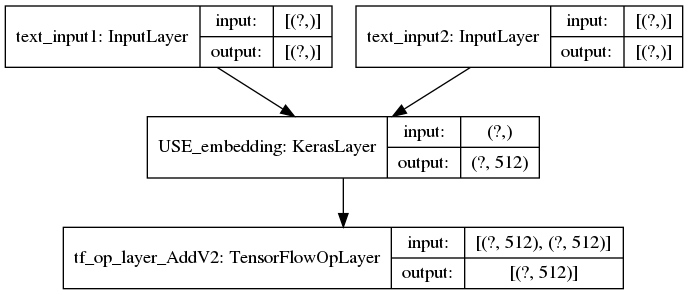

In [15]:
model.summary()
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

keras.utils.plot_model(model, "model.png", show_shapes=True)

In [16]:
tmp_text1 = ["hello", "1"]
tmp_text2 = ["hello2", "2"]
model.predict( [tmp_text1, tmp_text2] )

ValueError: in user code:

    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1147 predict_function  *
        outputs = self.distribute_strategy.run(
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow_hub/keras_layer.py:228 call  *
        result = f()
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/saved_model/load.py:486 _call_attribute  **
        return instance.__call__(*args, **kwargs)
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/eager/def_function.py:580 __call__
        result = self._call(*args, **kwds)
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/eager/def_function.py:618 _call
        results = self._stateful_fn(*args, **kwds)
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/eager/function.py:2420 __call__
        return graph_function._filtered_call(args, kwargs)  # pylint: disable=protected-access
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/eager/function.py:1665 _filtered_call
        self.captured_inputs)
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/eager/function.py:1760 _call_flat
        flat_outputs = forward_function.call(ctx, args_with_tangents)
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/eager/function.py:627 call
        executor_type=executor_type)
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/ops/functional_ops.py:1180 partitioned_call
        op = graph.create_op(op_name, args, tout, name=op_name, attrs=op_attrs)
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py:507 new_func
        return func(*args, **kwargs)
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:3258 create_op
        attrs, op_def, compute_device)
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/framework/func_graph.py:595 _create_op_internal
        compute_device)
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:3327 _create_op_internal
        op_def=op_def)
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:1817 __init__
        control_input_ops, op_def)
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:1657 _create_c_op
        raise ValueError(str(e))

    ValueError: Shape must be rank 1 but is rank 2 for '{{node text_preprocessor_1/tokenize/StringSplit/StringSplit}} = StringSplit[skip_empty=true](text_preprocessor_1/StaticRegexReplace_1, text_preprocessor_1/tokenize/StringSplit/Const)' with input shapes: [?,2], [].


# TEST

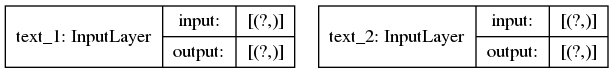

In [11]:
import pandas as pd
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras import layers
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam, SGD

tf.__version__

# define two input_text
text_1 = Input(shape=(), name="text_1", dtype=tf.string)
text_2 = Input(shape=(), name="text_2", dtype=tf.string)

# output_1 = tf.squeeze(input_1)
# output_2 = tf.squeeze(input_2)

ret = text_2

model = keras.Model(
    inputs=[text_1, text_2],
    outputs=[ret]
)

# model.summary()
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

keras.utils.plot_model(model, "model.png", show_shapes=True)

In [12]:
model.input

[<tf.Tensor 'text_1:0' shape=(None,) dtype=string>,
 <tf.Tensor 'text_2:0' shape=(None,) dtype=string>]

In [13]:
model.output

<tf.Tensor 'text_2:0' shape=(None,) dtype=string>

In [10]:
# tmp1 = np.random.randint(5, size=(1280))
# tmp2 = np.random.randint(5, size=(1280))

# tmp1 = [ ["1string good"], ["1"], ["333"]]
# tmp2 = [ ["1string good"], ["1"], ["333"]]

tmp1 = ["1", "2", "3", "4"]
tmp2 = ["221", "222", "223", "224"]

np.shape(tmp1), np.shape(tmp2)

((4,), (4,))

In [19]:
tmp_in = (tmp1, tmp2)
tmp_in = np.transpose(tmp_in)
np.shape(tmp_in)

(4, 2)

In [16]:
np.shape(model.input)

(2,)

In [21]:
model.predict( tmp_in )
# model.predict(
#     {"text_1": tmp1}
# )

AssertionError: in user code:

    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1147 predict_function  *
        outputs = self.distribute_strategy.run(
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1122 predict_step  **
        return self(x, training=False)
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/keras/engine/network.py:719 call
        convert_kwargs_to_constants=base_layer_utils.call_context().saving)
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/keras/engine/network.py:899 _run_internal_graph
        assert str(id(x)) in tensor_dict, 'Could not compute output ' + str(x)

    AssertionError: Could not compute output Tensor("text_2:0", shape=(None,), dtype=string)


In [15]:
import pandas as pd
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam, SGD

num_tags = 12  # Number of unique issue tags
num_words = 10000  # Size of vocabulary obtained when preprocessing text data
num_departments = 4  # Number of departments for predictions

title_input = keras.Input(
    shape=(None,), name="title"
)  # Variable-length sequence of ints
body_input = keras.Input(shape=(None,), name="body")  # Variable-length sequence of ints
tags_input = keras.Input(
    shape=(num_tags,), name="tags"
)  # Binary vectors of size `num_tags`

# Embed each word in the title into a 64-dimensional vector
title_features = layers.Embedding(num_words, 64)(title_input)
# Embed each word in the text into a 64-dimensional vector
body_features = layers.Embedding(num_words, 64)(body_input)

# Reduce sequence of embedded words in the title into a single 128-dimensional vector
title_features = layers.LSTM(128)(title_features)
# Reduce sequence of embedded words in the body into a single 32-dimensional vector
body_features = layers.LSTM(32)(body_features)

# Merge all available features into a single large vector via concatenation
x = layers.concatenate([title_features, body_features, tags_input])

# Stick a logistic regression for priority prediction on top of the features
priority_pred = layers.Dense(1, name="priority")(x)
# Stick a department classifier on top of the features
department_pred = layers.Dense(num_departments, name="department")(x)

# Instantiate an end-to-end model predicting both priority and department
model = keras.Model(
    inputs=[title_input, body_input, tags_input],
    outputs=[priority_pred, department_pred],
)

# Dummy input data
title_data = np.random.randint(num_words, size=(1280, 50))
body_data = np.random.randint(num_words, size=(1280, 100))
tags_data = np.random.randint(2, size=(1280, num_tags)).astype("float32")

# Dummy target data
priority_targets = np.random.random(size=(1280, 1))
dept_targets = np.random.randint(2, size=(1280, num_departments))

# model.predict( {"title": title_data, "body": body_data, "tags": tags_data} )

model.predict( [title_data, body_data, tags_data] )

[array([[-0.015915  ],
        [-0.24775344],
        [-0.05464256],
        ...,
        [-0.3124888 ],
        [ 0.06164359],
        [ 0.24253616]], dtype=float32),
 array([[ 0.05579381, -0.12733601, -0.09123342, -0.15799496],
        [-0.27038717,  0.34276387, -0.20604542, -0.07760201],
        [ 0.02506975, -0.02047846,  0.21869506, -0.5217197 ],
        ...,
        [ 0.24659787,  0.25216568, -0.22595662, -0.4720757 ],
        [-0.0646097 , -0.06022188, -0.12193778, -0.14170757],
        [ 0.00651811, -0.26244915, -0.29913828, -0.01480041]],
       dtype=float32)]

In [16]:
model.input

[<tf.Tensor 'title_2:0' shape=(None, None) dtype=float32>,
 <tf.Tensor 'body_2:0' shape=(None, None) dtype=float32>,
 <tf.Tensor 'tags_2:0' shape=(None, 12) dtype=float32>]

In [17]:
np.shape(title_data), np.shape(body_data), np.shape(tags_data)

((1280, 50), (1280, 100), (1280, 12))

In [5]:
ret = model.predict(tmp1)
ret

array([b'hello', b'good'], dtype=object)

In [10]:
np.shape(ret)

(2,)

In [41]:
logit = tf.reduce_sum(tf.multiply(x_1.output, x_2.output), 1, keepdims=True)
logit = tf.squeeze(logit)

In [43]:
model = tf.keras.Model(inputs=[x_1.input, x_2.input], outputs=logit)

In [52]:
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss="binary_crossentropy", optimizer=opt)

In [54]:
model.predict(["hello", "boy"])

AssertionError: in user code:

    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1147 predict_function  *
        outputs = self.distribute_strategy.run(
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1122 predict_step  **
        return self(x, training=False)
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:927 __call__
        outputs = call_fn(cast_inputs, *args, **kwargs)
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/keras/engine/network.py:719 call
        convert_kwargs_to_constants=base_layer_utils.call_context().saving)
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/keras/engine/network.py:899 _run_internal_graph
        assert str(id(x)) in tensor_dict, 'Could not compute output ' + str(x)

    AssertionError: Could not compute output Tensor("Squeeze_1:0", dtype=float32)


In [50]:
train_text1 = ["hello", "boy"]
train_text2 = ["hello", "girl"]
trainY = [1.0, 0.0]

In [51]:
model.fit(
    x = [train_text1, train_text2], y=trainY,
    epochs=10,
    batch_size=1
)

Epoch 1/10


ValueError: in user code:

    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow_hub/keras_layer.py:228 call  *
        result = f()
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/saved_model/load.py:486 _call_attribute  **
        return instance.__call__(*args, **kwargs)
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/eager/def_function.py:580 __call__
        result = self._call(*args, **kwds)
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/eager/def_function.py:618 _call
        results = self._stateful_fn(*args, **kwds)
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/eager/function.py:2420 __call__
        return graph_function._filtered_call(args, kwargs)  # pylint: disable=protected-access
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/eager/function.py:1665 _filtered_call
        self.captured_inputs)
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/eager/function.py:1760 _call_flat
        flat_outputs = forward_function.call(ctx, args_with_tangents)
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/eager/function.py:627 call
        executor_type=executor_type)
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/ops/functional_ops.py:1180 partitioned_call
        op = graph.create_op(op_name, args, tout, name=op_name, attrs=op_attrs)
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py:507 new_func
        return func(*args, **kwargs)
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:3258 create_op
        attrs, op_def, compute_device)
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/framework/func_graph.py:595 _create_op_internal
        compute_device)
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:3327 _create_op_internal
        op_def=op_def)
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:1817 __init__
        control_input_ops, op_def)
    /home/syoon/anaconda3/envs/upe/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:1657 _create_c_op
        raise ValueError(str(e))

    ValueError: Shape must be rank 1 but is rank 2 for '{{node text_preprocessor_1/tokenize/StringSplit/StringSplit}} = StringSplit[skip_empty=true](text_preprocessor_1/StaticRegexReplace_1, text_preprocessor_1/tokenize/StringSplit/Const)' with input shapes: [1,2], [].


In [12]:
# def count_number_trainable_params():
#     '''
#     Counts the number of trainable variables.
#     '''
#     tot_nb_params = 0
#     for trainable_variable in tf.trainable_variables():
#         shape = trainable_variable.get_shape() # e.g [D,F] or [W,H,C]
#         current_nb_params = get_nb_params_shape(shape)
#         tot_nb_params = tot_nb_params + current_nb_params
#     return tot_nb_params

# def get_nb_params_shape(shape):
#     '''
#     Computes the total number of params for a given shap.
#     Works for any number of shapes etc [D,F] or [W,H,C] computes D*F and W*H*C.
#     '''
#     nb_params = 1
#     for dim in shape:
#         nb_params = nb_params*int(dim)
#     return nb_params 

In [1]:
import pandas as pd

# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

import tensorflow_hub as hub
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Dropout, Concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

# import os
# os.environ["CUDA_VISIBLE_DEVICES"]="7"

In [4]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/2"
module = hub.Module(module_url, trainable=True)

print(module.get_signature_names())
print(module.get_input_info_dict())   # When no signature is given, considers it as 'default'
print(module.get_output_info_dict(signature='default'))
# tf.trainable_variables()

RuntimeError: Exporting/importing meta graphs is not supported when eager execution is enabled. No graph exists when eager execution is enabled.

In [3]:
text_1 = tf.placeholder(dtype=tf.string, shape=[None], name="text_input1")
text_2 = tf.placeholder(dtype=tf.string, shape=[None], name="text_input2")
y_labels = tf.placeholder(dtype=tf.float32, shape=[None], name="y_label")

In [4]:
# model

embed_1 = module(dict(text=text_1))
embed_2 = module(dict(text=text_2))

if 0:
    print("add similarity matrix")
    M = tf.Variable(tf.random_uniform([512, 512],
                                          minval= -0.25,
                                          maxval= 0.25,
                                          dtype=tf.float32,
                                          seed=None),
                        trainable=True,
                        name="similarity_matrix")

    b = tf.Variable(tf.zeros([512], dtype=tf.float32),
                         trainable=True,
                         name="output_bias")

    tmp_y = tf.matmul(embed_1, M) + b
    tf.reduce_sum( tf.multiply(tmp_y, embed_2), 1, keep_dims=True )

else:
    print("direct cos-sim")
    logit = tf.reduce_sum( tf.multiply(embed_1, embed_2), 1, keep_dims=True )
    logit = tf.squeeze(logit)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


direct cos-sim
Instructions for updating:
keep_dims is deprecated, use keepdims instead


Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [5]:
# # loss

batch_loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, labels=y_labels )
loss = tf.reduce_mean(batch_loss)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
# optimizer

opt_func = tf.train.AdamOptimizer(learning_rate=0.001)
gvs = opt_func.compute_gradients(loss)
capped_gvs = [(tf.clip_by_value(t=grad, clip_value_min=-10, clip_value_max=10), var) for grad, var in gvs]
optimizer = opt_func.apply_gradients(grads_and_vars=capped_gvs)

ValueError: None values not supported.

In [ ]:
txt1 = [
    "The quick brown fox jumps over the lazy dog.",
    "I am a sentence for which I would like to get its embedding"]

txt2 = [
    "The quick brown fox jumps over the lazy dog.",
    "I am a sentence for which I would like to get its embedding"]


input_feed = {}
input_feed[text_1] = txt1
input_feed[text_2] = txt2

In [ ]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

sess = tf.Session(config=config)
sess.run([tf.global_variables_initializer(), tf.tables_initializer()])
#     print("Number of trainable parameters: %d" % count_number_trainable_params())
rst, emb1, emb2 = sess.run([logit, embed_1, embed_2], input_feed)

In [7]:
rst

NameError: name 'rst' is not defined

In [17]:
# tf.trainable_variables()

In [16]:
sess.close()

## Train

### before train

In [18]:
test_txt1 = [
    "The quick brown fox jumps over the lazy dog.",
    "I am a sentence for which I would like to get its embedding"]

test_txt2 = [
    "The quick brown fox jumps over the lazy dog.",
    "I am a sentence for which I would like to get its embedding"]

input_feed = {}
input_feed[text_1] = test_txt1
input_feed[text_2] = test_txt2

config = tf.ConfigProto()
config.gpu_options.allow_growth = True

session = tf.Session(config=config)
session.run([tf.global_variables_initializer(), tf.tables_initializer()])
rst, before_emb1, before_emb2 = session.run([logit, embed_1, embed_2], input_feed)

In [1]:
train_txt1 = [
    "i went to school",
    "i went to school"]

train_txt2 = [
    "he went to school",
    "she went to school"]

train_label = [1.0, 0.0]


input_feed = {}
input_feed[text_1] = train_txt1
input_feed[text_2] = train_txt2
input_feed[y_labels] = train_label

NameError: name 'text_1' is not defined

In [21]:
# train model

for i in range(10):
    _, train_loss = session.run([optimizer, loss], input_feed)
    if i%5 == 0: print(i, train_loss)

0 0.75219166
5 0.6993482


In [22]:
# check model

input_feed = {}
input_feed[text_1] = test_txt1
input_feed[text_2] = test_txt2

rst, after_emb1, after_emb2 = session.run([logit, embed_1, embed_2], input_feed)

In [23]:
before_emb1[0] == after_emb1[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [24]:
saver = tf.train.Saver()
saver.save(sess, "../data/models/tmp")

RuntimeError: Attempted to use a closed Session.

## save / load session

In [ ]:
ckpt = tf.train.get_checkpoint_state(os.path.dirname('save/' + graph_dir_name + '/'))
        if ckpt and ckpt.model_checkpoint_path:
            print ('from check point!!!')
            saver.restore(sess, ckpt.model_checkpoint_path)

In [1]:
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Dropout, Concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

# import os
# os.environ["CUDA_VISIBLE_DEVICES"]="7"

In [2]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/2"
# module_url = 'https://tfhub.dev/google/universal-sentence-encoder-large/3'
hub_layer = hub.Module(module_url, trainable=True, name='USE_embedding')

In [3]:
# hub_layer.variables

In [4]:
inputs = tf.keras.layers.Input(shape=[], dtype=tf.string, name="inputs")
outputs = hub_layer(inputs=inputs)
dense = tf.keras.layers.Dense(256, activation='relu')(outputs)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


FailedPreconditionError: 2 root error(s) found.
  (0) Failed precondition: Attempting to use uninitialized value USE_embedding/Encoder_en/DNN/ResidualHidden_3/weights
	 [[{{node USE_embedding_apply_default/Encoder_en/DNN/ResidualHidden_3/weights/read}}]]
  (1) Failed precondition: Attempting to use uninitialized value USE_embedding/Encoder_en/DNN/ResidualHidden_3/weights
	 [[{{node USE_embedding_apply_default/Encoder_en/DNN/ResidualHidden_3/weights/read}}]]
	 [[USE_embedding_apply_default/Encoder_en/DNN/ResidualHidden_3/weights/read/_1]]
0 successful operations.
0 derived errors ignored.

In [5]:
model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

FailedPreconditionError: Attempting to use uninitialized value USE_embedding/Encoder_en/hidden_layers/tanh_layer_0/dense/bias
	 [[{{node USE_embedding_apply_default/Encoder_en/hidden_layers/tanh_layer_0/dense/bias/read}}]]

In [5]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
# model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE_embedding (KerasLayer)   {'outputs': (None, 512)}  256797824 
_________________________________________________________________
dense_1 (Dense)              (None, 16)                8208      
Total params: 256,806,032
Trainable params: 256,806,032
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(Adam(2e-5), loss='binary_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               metrics=['accuracy'])

In [16]:
model.predict(["hello"])

AttributeError: 'str' object has no attribute 'shape'

In [3]:


model.compile(Adam(2e-5), loss='binary_crossentropy', metrics=['accuracy'])    

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE_embedding (KerasLayer)   {'outputs': (None, 512)}  256797824 
Total params: 256,797,824
Trainable params: 256,797,824
Non-trainable params: 0
_________________________________________________________________


In [7]:
test_txt1 = [
    "The quick brown fox jumps over the lazy dog.",
    "I am a sentence for which I would like to get its embedding"]

test_txt2 = [
    "The quick brown fox jumps over the lazy dog.",
    "I am a sentence for which I would like to get its embedding"]

In [9]:
test_pred = model.predict("hello")

AttributeError: 'str' object has no attribute 'shape'

In [7]:
import pandas as pd
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras import layers
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam, SGD

tf.__version__

# module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
module_url = 'https://tfhub.dev/google/universal-sentence-encoder-large/5'
embed = hub.KerasLayer(module_url, trainable=True, name='USE_embedding')

In [13]:
embed.inputs

AttributeError: 'KerasLayer' object has no attribute 'inputs'